# Bag of Words - BoW

With acknowledgements to Rahul Vasaikar https://github.com/rahulvasaikar

This notebook builds a simple bag of words model from first principles. We will then see how you can use the SciKitLearn module to build BoW models, and visualises it along a small number of axes.



Firsrt, we will import some useful modules for handling strings and collections, and also SciKit and pandas for our second version of BoW.

In [0]:
# Import some useful modules, to implement a Bag of Words from scratch
import string
import pprint
from collections import Counter

# Modules we will use to implement another version of Bag of Words with SciKitLearn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


Let's make some simple documents, in a list.

In [0]:
documents = ['Klonopin 0.25 mg po every evening, Fluconazole 200 mg po daily, Synthroid 125 mcg po every day',
             'She will not consider switching to clozapine',
             'lovastatin 40 mg one half tab po daily, multivitamin daily, metformin 500 mg one tab po twice a day',
             'Aspirin 81 mg po once daily, Zoloft 25 mg po once daily, Calcium with vitamin D two tablets po once daily']



Let's "normalise" our documents, to remove punctuation and case differences. We could do more here - what NLP techniques might you apply to iron out differences between similar words?

In [3]:
normalised_documents = []
for i in documents:
    no_punctuation = ''.join(c for c in i if c not in string.punctuation)
    normalised_documents.append(no_punctuation.lower())
    
for i in normalised_documents:
  print(i)

klonopin 025 mg po every evening fluconazole 200 mg po daily synthroid 125 mcg po every day
she will not consider switching to clozapine
lovastatin 40 mg one half tab po daily multivitamin daily metformin 500 mg one tab po twice a day
aspirin 81 mg po once daily zoloft 25 mg po once daily calcium with vitamin d two tablets po once daily


Now let's split them up in to tokens, by splitting at whitespace. We could use a tokeniser for this, e.g. from nltk. Why might this be better?

In [4]:
tokenised_documents = []
for i in normalised_documents:
    tokenised_documents.append(i.split(' '))

for i in tokenised_documents:
  print(i)

['klonopin', '025', 'mg', 'po', 'every', 'evening', 'fluconazole', '200', 'mg', 'po', 'daily', 'synthroid', '125', 'mcg', 'po', 'every', 'day']
['she', 'will', 'not', 'consider', 'switching', 'to', 'clozapine']
['lovastatin', '40', 'mg', 'one', 'half', 'tab', 'po', 'daily', 'multivitamin', 'daily', 'metformin', '500', 'mg', 'one', 'tab', 'po', 'twice', 'a', 'day']
['aspirin', '81', 'mg', 'po', 'once', 'daily', 'zoloft', '25', 'mg', 'po', 'once', 'daily', 'calcium', 'with', 'vitamin', 'd', 'two', 'tablets', 'po', 'once', 'daily']


Let's  find the frequency of each unique token in our documents, i.e. the Bag of Words - BoW.

In [5]:
frequency_list = []
import pprint
from collections import Counter

for i in tokenised_documents:
    frequency_list.append(Counter(i))

pp = pprint.PrettyPrinter(width=200)
pp.pprint(frequency_list)

[Counter({'po': 3, 'mg': 2, 'every': 2, 'klonopin': 1, '025': 1, 'evening': 1, 'fluconazole': 1, '200': 1, 'daily': 1, 'synthroid': 1, '125': 1, 'mcg': 1, 'day': 1}),
 Counter({'she': 1, 'will': 1, 'not': 1, 'consider': 1, 'switching': 1, 'to': 1, 'clozapine': 1}),
 Counter({'mg': 2, 'one': 2, 'tab': 2, 'po': 2, 'daily': 2, 'lovastatin': 1, '40': 1, 'half': 1, 'multivitamin': 1, 'metformin': 1, '500': 1, 'twice': 1, 'a': 1, 'day': 1}),
 Counter({'po': 3, 'once': 3, 'daily': 3, 'mg': 2, 'aspirin': 1, '81': 1, 'zoloft': 1, '25': 1, 'calcium': 1, 'with': 1, 'vitamin': 1, 'd': 1, 'two': 1, 'tablets': 1})]


Now let's do the same with SciKitLearn, using the CountVectorizer class
. We define a token pattern that excludes numbers, and we also remove english stopwords.

In [0]:
count_vector = CountVectorizer(input=documents, token_pattern=r'\b[^\d\W]+\b', stop_words = 'english')

Now let's run our vectorizer, to make the bag of words. We will print our token features. Note how all punctuation has been removed by default. 


In [7]:
count_vector.fit(documents)
count_vector.get_feature_names()

['aspirin',
 'calcium',
 'clozapine',
 'consider',
 'd',
 'daily',
 'day',
 'evening',
 'fluconazole',
 'half',
 'klonopin',
 'lovastatin',
 'mcg',
 'metformin',
 'mg',
 'multivitamin',
 'po',
 'switching',
 'synthroid',
 'tab',
 'tablets',
 'twice',
 'vitamin',
 'zoloft']

Let's transform our  documents in to count vectors and take a look:

In [8]:
doc_array = count_vector.transform(documents).toarray()
print(doc_array)

[[0 0 0 0 0 1 1 1 1 0 1 0 1 0 2 0 3 0 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 2 1 0 0 1 0 1 0 1 2 1 2 0 0 2 0 1 0 0]
 [1 1 0 0 1 3 0 0 0 0 0 0 0 0 2 0 3 0 0 0 1 0 1 1]]


And looking at how this encodes each document against the word dimensions: 

In [9]:
frequency_matrix = pd.DataFrame(doc_array,index=documents,columns=count_vector.get_feature_names())
frequency_matrix

,aspirin,calcium,clozapine,consider,d,daily,day,evening,fluconazole,half,klonopin,lovastatin,mcg,metformin,mg,multivitamin,po,switching,synthroid,tab,tablets,twice,vitamin,zoloft
"Klonopin 0.25 mg po every evening, Fluconazole 200 mg po daily, Synthroid 125 mcg po every day",0,0,0,0,0,1,1,1,1,0,1,0,1,0,2,0,3,0,1,0,0,0,0,0
She will not consider switching to clozapine,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
"lovastatin 40 mg one half tab po daily, multivitamin daily, metformin 500 mg one tab po twice a day",0,0,0,0,0,2,1,0,0,1,0,1,0,1,2,1,2,0,0,2,0,1,0,0
"Aspirin 81 mg po once daily, Zoloft 25 mg po once daily, Calcium with vitamin D two tablets po once daily",1,1,0,0,1,3,0,0,0,0,0,0,0,0,2,0,3,0,0,0,1,0,1,1


We can spot the difference between our documents. To imagine what it would look like if we plotted these in a multidimensional space, with one dimension for each word in our vocabulary, let's restrict our vocabulary to just three of the words for now.

In [10]:
count_vector = CountVectorizer(input=documents, token_pattern=r'\b[^\d\W]+\b', stop_words = 'english', vocabulary=['daily','mg','po'])
count_vector.fit(documents)
doc_array = count_vector.transform(documents).toarray()
frequency_matrix = pd.DataFrame(doc_array,index=documents,columns=count_vector.get_feature_names())
frequency_matrix

,daily,mg,po
"Klonopin 0.25 mg po every evening, Fluconazole 200 mg po daily, Synthroid 125 mcg po every day",1,2,3
She will not consider switching to clozapine,0,0,0
"lovastatin 40 mg one half tab po daily, multivitamin daily, metformin 500 mg one tab po twice a day",2,2,2
"Aspirin 81 mg po once daily, Zoloft 25 mg po once daily, Calcium with vitamin D two tablets po once daily",3,2,3


Our plotting module needs one array for  each of our three dimensions, instead of one for each document:

In [11]:
rotated = list(zip(*doc_array[::-1]))
print(rotated)

[(3, 2, 0, 1), (2, 2, 0, 2), (3, 2, 0, 3)]


And now the plot:

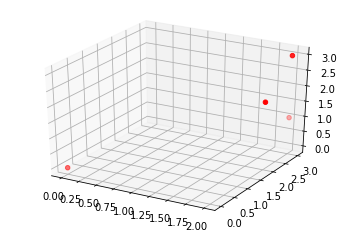

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
z,x,y = rotated
ax.scatter(list(x), list(y), list(z), zdir='z', c= 'red')